In [1]:
from astroquery.gaia import Gaia
from scipy import stats

import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt

import os

Important: Gaia archive will be intermittently unavailable due to scheduled maintenance on Thursday, the 20th of March, from 11:00 to 11:30.


In [2]:
cols =  ['source_id', 'random_index', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error', 'parallax_over_error', 'pm', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr',
          'phot_g_n_obs', 'phot_g_mean_flux', 'phot_g_mean_flux_error', 'phot_g_mean_flux_over_error',
         'phot_g_mean_mag', 'phot_bp_n_obs', 'phot_bp_mean_flux', 'phot_bp_mean_flux_error',
         'phot_bp_mean_flux_over_error', 'phot_bp_mean_mag', 'phot_rp_n_obs', 'phot_rp_mean_flux',
         'phot_rp_mean_flux_error', 'phot_rp_mean_flux_over_error', 'phot_rp_mean_mag',
         'phot_bp_rp_excess_factor', 'phot_bp_n_contaminated_transits', 'phot_bp_n_blended_transits',
         'phot_rp_n_blended_transits',
         'bp_rp', 'bp_g', 'g_rp', 'radial_velocity', 'radial_velocity_error',
         'rv_expected_sig_to_noise', 'rv_renormalised_gof', 'rv_chisq_pvalue', 
         'rv_template_teff', 'rv_template_logg', 'rv_template_fe_h', 'rv_atm_param_origin',
         'vbroad', 'vbroad_error', 'vbroad_nb_transits',
         'grvs_mag', 'grvs_mag_error', 'grvs_mag_nb_transits',
         'rvs_spec_sig_to_noise', 'phot_variable_flag',
         'l', 'b', 'ecl_lon', 'ecl_lat',
         'in_qso_candidates', 'in_galaxy_candidates', 'non_single_star', 'has_xp_continuous', 'has_xp_sampled', 'has_rvs', 'has_epoch_photometry', 'has_epoch_rv', 'has_mcmc_gspphot', 'has_mcmc_msc',
         'teff_gspphot', 'teff_gspphot_lower', 'teff_gspphot_upper', 'logg_gspphot',
'logg_gspphot_lower', 'logg_gspphot_upper',
         'mh_gspphot', 'mh_gspphot_lower', 'mh_gspphot_upper',
         'distance_gspphot', 'distance_gspphot_lower', 'distance_gspphot_upper',
         'azero_gspphot', 'azero_gspphot_lower', 'azero_gspphot_upper', 'ag_gspphot', 'ag_gspphot_lower', 'ag_gspphot_upper', 'ebpminrp_gspphot', 'ebpminrp_gspphot_lower', 'ebpminrp_gspphot_upper', 'parallax_corr', 'parallax_corr_error', 'distance', 'x', 'y', 'z', 'pml', 'pmb', 'vx', 'vy', 'vz', 'X', 'Y', 'Z', 'vX', 'vY', 'vZ', 'phi', 'R', 'vR', 'vT', 'v_toomre']

In [ ]:
premade_testing_data = "C:\Games\ThesisData\precutGaiaData\GaiaDR3_poege5_DoddQuality_2p5kpc.parquet"
df_test = pl.read_parquet(premade_testing_data).select(cols)

In [ ]:
df_test = df_test.with_columns(
    (pl.col('vT')-220).alias('vT_adj'))
#print(df_test.filter(pl.col('vT_adj')))
filtered_vT = df_test.filter(pl.col('vT_adj').is_between(-500, 150)).select('vT_adj').to_numpy()
# min_val = abs(filtered_vT.min())+1e-6
# max_val = abs(filtered_vT.max())+1e-6

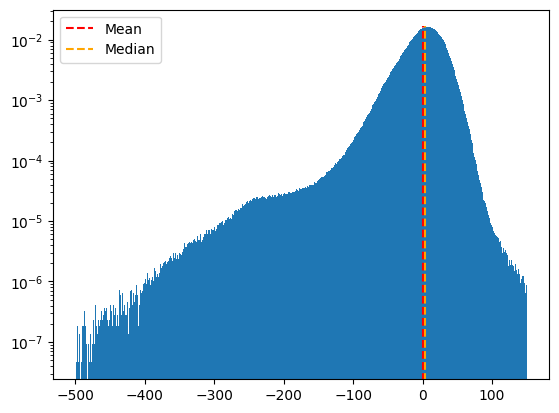

In [7]:
N_bins = 500

fig, ax = plt.subplots(1, 1)

counts, bins = np.histogram(filtered_vT, bins=N_bins, density=True)

bins = (bins[1:] + bins[:-1]) / 2

ax.vlines(np.mean(filtered_vT), 0, counts.max(), colors='r', linestyles='dashed', label='Mean')
ax.vlines(np.median(filtered_vT), 0, counts.max(), colors='orange', linestyles='dashed', label='Median')
ax.legend()

ax.hist(filtered_vT, bins=N_bins, density=True)
# ax.plot(bins, counts, '.')
ax.set_yscale('log')
plt.show()

In [7]:
# skew_params = stats.skewnorm.fit(filtered_vT)
# lognorm_params = stats.lognorm.fit(filtered_vT+min_val)
# gennorm_params = stats.gennorm.fit(filtered_vT)
# norm_params = stats.norm.fit(filtered_vT)

# norm_params, skew_params, lognorm_params, gennorm_params

In [8]:
stats.skew(filtered_vT), stats.kurtosis(filtered_vT)

(array([-2.15881887]), array([13.94752734]))

In [8]:
from scipy.optimize import curve_fit

def skew_norm_func(x, a, loc, scale):
    return stats.skewnorm.pdf(x, a, loc, scale)

def norm_func(x, loc, scale):
    return stats.norm.pdf(x, loc, scale)

def gennorm_func(x, beta, loc, scale):
    return stats.gennorm.pdf(x, beta, loc, scale)

def johnsonsu_func(x, a, b, loc, scale):
    return stats.johnsonsu.pdf(x, a, b, loc, scale)

skew_popt, skew_pcov = curve_fit(skew_norm_func, bins, counts)
norm_popt, norm_pcov = curve_fit(norm_func, bins, counts)
gennorm_popt, gennorm_pcov = curve_fit(gennorm_func, bins, counts)
johnsonsu_popt, johnsonsu_pcov = curve_fit(johnsonsu_func, bins, counts)

skew_popt, norm_popt, gennorm_popt, johnsonsu_popt

(array([-2.05051697, 28.25570701, 36.75461357]),
 array([ 5.37034761, 24.65087204]),
 array([ 1.6612116 ,  5.57238793, 33.10465185]),
 array([ 0.99261324,  2.02477554, 26.87201385, 44.72305567]))

In [9]:
fit_results = [
    ["skew_norm_func", skew_popt, 0, 0],
    ["norm_func", norm_popt, 0, 0],
    ["gennorm_func", gennorm_popt, 0, 0],
    ["johnsonsu_func", johnsonsu_popt, 0, 0]
]

def r_squared(ydata, xdata, popt, f):
    residuals = ydata- f(xdata, *popt)
    ss_res = np.sum(residuals**2)

    ss_tot = np.sum((ydata-np.mean(ydata))**2)

    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

def residuals(ydata, xdata, popt, f):
    return np.sum((ydata - f(xdata, *popt))**2)

for single_result in fit_results:
    single_result[2] = r_squared(counts, bins, single_result[1], eval(single_result[0]))
    single_result[3] = residuals(counts, bins, single_result[1], eval(single_result[0]))

fit_results.sort(key=lambda l:l[2], reverse=True)
for fit_func, _, r2, res in fit_results:
    print(f"{fit_func}: r2 = {r2:.6f}, S = {res:.6f}")

johnsonsu_func: r2 = 0.999675, S = 0.000002
skew_norm_func: r2 = 0.997980, S = 0.000015
gennorm_func: r2 = 0.992241, S = 0.000056
norm_func: r2 = 0.989886, S = 0.000073


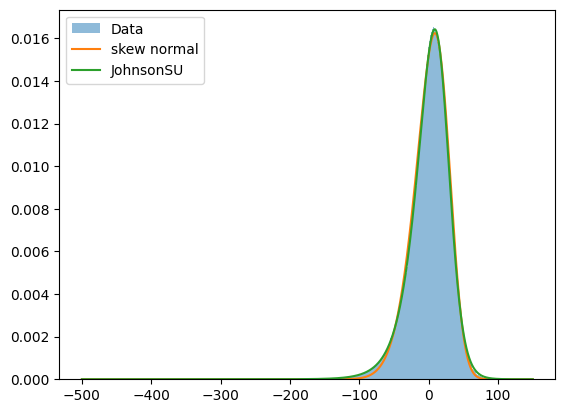

In [11]:
fig, ax = plt.subplots(1, 1)

sample_vT = np.linspace(-500, 150, 1000)

ax.hist(filtered_vT, bins=N_bins, density=True, alpha=0.5, label='Data')

ax.plot(sample_vT, skew_norm_func(sample_vT, *skew_popt), label='skew normal')
#ax.plot(sample_vT, norm_func(sample_vT, *norm_popt), label='normal')
#ax.plot(sample_vT, gennorm_func(sample_vT, *gennorm_popt), label='generalised normal')
ax.plot(sample_vT, johnsonsu_func(sample_vT, *johnsonsu_popt), label='JohnsonSU')


# ax.plot(sample_vT, log_norm_func(sample_vT+min_val, *log_popt)-min_val, c='orange')
# ax.plot(sample_vT, gamma_func(sample_vT, *gamma_popt), c='orange')
# ax.plot(sample_vT, beta_func(sample_vT+min_val, *beta_popt), c='yellow')

ax.legend()
#ax.set_yscale('log')

plt.show()